In [ ]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

# Beta expected value

$$
\hat{\beta} = \left( X^{T} X \right)^{-1} X^{T} y
$$

In [ ]:
mu_x1 = 100
sigma_x1 = 0.3
mu_x2 = 50
sigma_x2 = 6
mu_x3 = 15
sigma_x3 = 5
n_population <- 12000000  # if  you dont take a big number then the results not close to the theorical population this affects
#particularly the varaince of estimations.
x1 <- rnorm(n_population, mu_x1, sigma_x1) + seq(1, 100, length.out = n_population) + runif(n_population, 80, 1200)
x2 <- rnorm(n_population , mu_x2, sigma_x2) + seq(200, 365, length.out = n_population) + runif(n_population, 1, 600)
x3 <- rnorm(n_population, mu_x3, sigma_x3) + seq(800, 2345, length.out = n_population) + runif(n_population, 50, 700)

In [ ]:
# Define function
f_linear <- function(b0, b1, b2, b3, x1, x2, x3, error_sigma){
  return(b0  + b1*x1 + b2*x2  + b3*x3 + rnorm(length(x1), 0, error_sigma))
}

In [ ]:
# Defining the creation of data
b0 <- 120
b1 <- 13.13
b2 <- 41.87
b3 <- 61.76
error_sigma <- 20
y <- f_linear(b0= b0, b1= b1, b2= b2, b3= b3,
x1=x1,  x2 = x2,  x3 = x3, error_sigma = error_sigma)
data <- cbind(x0=1, x1,x2, x3, y)

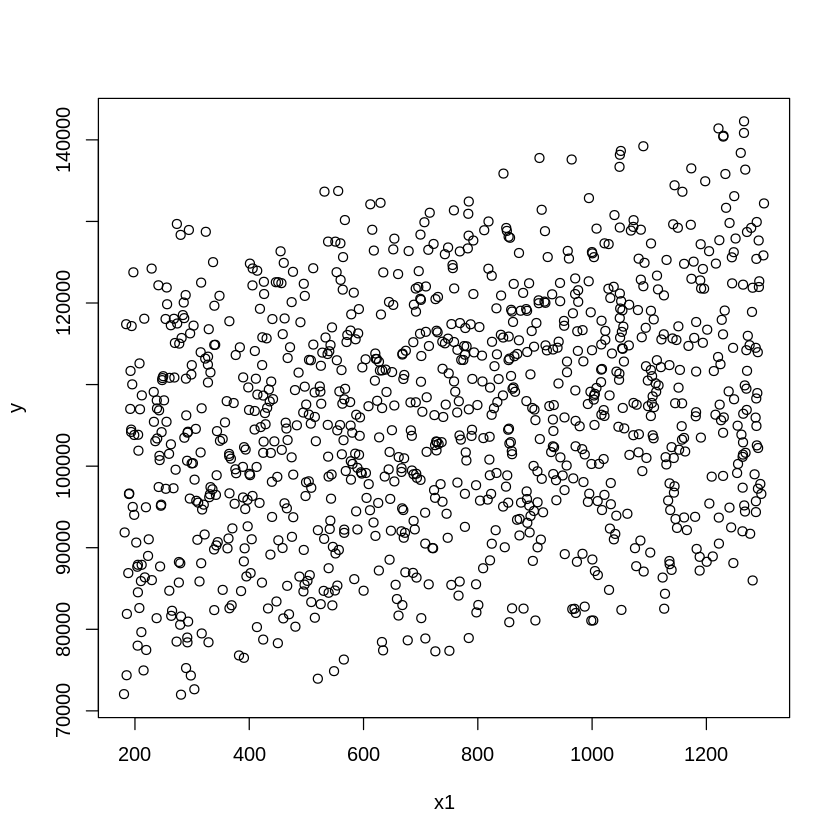

In [ ]:
plot(data[1:1000, 'x1'], data[1:1000, 'y'], col = "black", pch = 1, xlab = "x1", ylab = "y")

In [ ]:
betas <- function(X, y){ as.vector(solve(t(X) %*% X) %*% t(X) %*% y) }

In [ ]:
trials <- 1000 # simulatons...
sample_size <- 250
estimated_betas <- list()
for ( i in 1:trials){
sampled_data <- data[sample(1:nrow(data), sample_size),]
sampled_y <- sampled_data[, 'y']
sampled_X <- sampled_data[, c('x0', 'x1', 'x2', 'x3')]
estimated_betas <- append(estimated_betas, list(betas(sampled_X, sampled_y)))
}
estimated_betas <- do.call(rbind, estimated_betas)
colMeans(estimated_betas)

[1] 119.99533  13.13030  41.86995  61.75992

In [ ]:
# Error
as.vector(c(b0, b1, b2, b3)) - colMeans(estimated_betas)

[1]  4.668170e-03 -2.972281e-04  5.196482e-05  7.622854e-05

In [ ]:
# Variance of estimator

In [ ]:
# Empirical variance of estiamted coefficients
apply(estimated_betas, MARGIN=2, var)

[1] 4.928468e+01 1.541438e-05 5.171230e-05 7.225126e-06

In [ ]:
# Theorical variance
variance_betas <- diag((error_sigma^2)*solve(t(sampled_X) %*% sampled_X)) ## See the diagonal!!

In [ ]:
variance_betas # This coefficients are not perfect given my population is fixed

x0           x1           x2           x3 
4.609110e+01 1.538899e-05 5.561143e-05 7.721296e-06